# Capstone Project_Plant Pathology

## CNN Model

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

from keras import applications
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.layers.normalization import BatchNormalization


Conv2D = Convolution2D

Using TensorFlow backend.
C:\Users\aafat\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\aafat\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\aafat\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\aafat\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

### Load Dataset

In [4]:
test_data = pd.read_csv("../Data/test.csv")
train_data = pd.read_csv("../Data/balance_train.csv")

In [7]:
len(train_data)

2489

### Load train and test images and save them in 2 seperate lists

In [8]:
%%time

import cv2
img_size = 215 # reduce image size

train_image = []
for i in train_data['image_id']:
    path='..\images\\'+i+'.jpg'
    img=cv2.imread(path) # load the image
    image=cv2.resize(img,(img_size,img_size),interpolation=cv2.INTER_AREA) # resize the image
    train_image.append(image) # add image to train list

test_image = []
for i in test_data['image_id']:
    path='..\images\\'+i+'.jpg'
    img=cv2.imread(path) # load the image
    image=cv2.resize(img,(img_size,img_size),interpolation=cv2.INTER_AREA) # resize the image
    test_image.append(image) # add image to test list

In [9]:
x_train = np.asarray(train_image, dtype=np.float32) # change type to float32
x_train = x_train/255 # Normalization

x_train.shape

x_test = np.asarray(test_image, dtype=np.float32) # change type to float32
x_test = x_test/255 # Normalization

x_test.shape

y = train_data.iloc[:,1:5] # selecting classes as a target
y_train = np.array(y.values, dtype='float32') # change type to float32


from sklearn.model_selection import train_test_split
# split train data to subset data ( train and validation)
x_train, x_val, y_train, y_val = train_test_split(x_train, 
                                                  y_train, 
                                                  test_size = 0.20, 
                                                  random_state = 42 )

In [10]:
len(test_image)

1821

In [12]:
# Define NN model architecture

model = Sequential()

model.add(Conv2D(256, (3, 3),strides = 2, activation='relu', input_shape=(215, 215, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3),strides = 2, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3),strides = 2, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(4, activation='softmax'))

model.summary() # print model layers

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 107, 107, 256)     7168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 256)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 53, 53, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 256)       590080    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 256)       590080    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 256)        

In [13]:
# Compile NN model
model.compile(loss="categorical_crossentropy", optimizer= 'rmsprop', metrics=["accuracy"])

In [16]:
# Fitting the model
cnn_hist = model.fit(x_train,
        y_train,
        batch_size = 32,
        epochs = 250,
        verbose=1,
        validation_data = (x_val,y_val))

Train on 1991 samples, validate on 498 samples
Epoch 1/250
1991/1991 [==============================] - 86s 43ms/step - loss: 1.5930 - accuracy: 0.2466 - val_loss: 1.3768 - val_accuracy: 0.2791
Epoch 2/250
1991/1991 [==============================] - 85s 43ms/step - loss: 1.4764 - accuracy: 0.2823 - val_loss: 1.6651 - val_accuracy: 0.2550
Epoch 3/250
1991/1991 [==============================] - 86s 43ms/step - loss: 1.4769 - accuracy: 0.2657 - val_loss: 1.3751 - val_accuracy: 0.2932
Epoch 4/250
1991/1991 [==============================] - 85s 43ms/step - loss: 1.4353 - accuracy: 0.3084 - val_loss: 2.4190 - val_accuracy: 0.2871
Epoch 5/250
1991/1991 [==============================] - 85s 43ms/step - loss: 1.4862 - accuracy: 0.2928 - val_loss: 1.4121 - val_accuracy: 0.3635
Epoch 6/250
1991/1991 [==============================] - 85s 43ms/step - loss: 1.3996 - accuracy: 0.3265 - val_loss: 1.3241 - val_accuracy: 0.3655
Epoch 7/250
1991/1991 [==============================] - 85s 43ms/step 

1991/1991 [==============================] - 84s 42ms/step - loss: 0.1494 - accuracy: 0.9528 - val_loss: 0.7122 - val_accuracy: 0.8233
Epoch 112/250
1991/1991 [==============================] - 85s 42ms/step - loss: 0.1491 - accuracy: 0.9468 - val_loss: 0.5021 - val_accuracy: 0.8695
Epoch 113/250
1991/1991 [==============================] - 84s 42ms/step - loss: 0.1922 - accuracy: 0.9437 - val_loss: 0.5194 - val_accuracy: 0.8735
Epoch 114/250
1991/1991 [==============================] - 84s 42ms/step - loss: 0.1353 - accuracy: 0.9478 - val_loss: 0.9468 - val_accuracy: 0.7550
Epoch 115/250
1991/1991 [==============================] - 84s 42ms/step - loss: 0.1373 - accuracy: 0.9528 - val_loss: 0.6890 - val_accuracy: 0.8373
Epoch 116/250
1991/1991 [==============================] - 84s 42ms/step - loss: 0.1467 - accuracy: 0.9498 - val_loss: 0.5991 - val_accuracy: 0.8655
Epoch 117/250
1991/1991 [==============================] - 84s 42ms/step - loss: 0.1424 - accuracy: 0.9573 - val_loss: 0

1991/1991 [==============================] - 86s 43ms/step - loss: 0.1192 - accuracy: 0.9578 - val_loss: 1.1240 - val_accuracy: 0.8072
Epoch 167/250
1991/1991 [==============================] - 86s 43ms/step - loss: 0.1176 - accuracy: 0.9613 - val_loss: 0.7087 - val_accuracy: 0.8494
Epoch 168/250
1991/1991 [==============================] - 85s 43ms/step - loss: 0.1360 - accuracy: 0.9548 - val_loss: 0.6824 - val_accuracy: 0.8414
Epoch 169/250
1991/1991 [==============================] - 85s 43ms/step - loss: 0.1168 - accuracy: 0.9628 - val_loss: 0.8740 - val_accuracy: 0.8394
Epoch 170/250
1991/1991 [==============================] - 85s 43ms/step - loss: 0.1272 - accuracy: 0.9553 - val_loss: 0.7583 - val_accuracy: 0.8213
Epoch 171/250
1991/1991 [==============================] - 85s 43ms/step - loss: 0.1039 - accuracy: 0.9669 - val_loss: 0.8046 - val_accuracy: 0.8193
Epoch 172/250
1991/1991 [==============================] - 85s 43ms/step - loss: 0.1406 - accuracy: 0.9513 - val_loss: 0

1991/1991 [==============================] - 88s 44ms/step - loss: 0.1197 - accuracy: 0.9648 - val_loss: 0.6532 - val_accuracy: 0.8514
Epoch 222/250
1991/1991 [==============================] - 87s 44ms/step - loss: 0.0926 - accuracy: 0.9699 - val_loss: 0.6783 - val_accuracy: 0.8695
Epoch 223/250
1991/1991 [==============================] - 87s 44ms/step - loss: 0.1261 - accuracy: 0.9618 - val_loss: 0.6932 - val_accuracy: 0.8614
Epoch 224/250
1991/1991 [==============================] - 88s 44ms/step - loss: 0.1003 - accuracy: 0.9633 - val_loss: 0.6845 - val_accuracy: 0.8614
Epoch 225/250
1991/1991 [==============================] - 88s 44ms/step - loss: 0.1222 - accuracy: 0.9568 - val_loss: 0.9095 - val_accuracy: 0.8133
Epoch 226/250
1991/1991 [==============================] - 87s 44ms/step - loss: 0.1351 - accuracy: 0.9508 - val_loss: 0.9664 - val_accuracy: 0.8032
Epoch 227/250
1991/1991 [==============================] - 86s 43ms/step - loss: 0.1396 - accuracy: 0.9583 - val_loss: 0

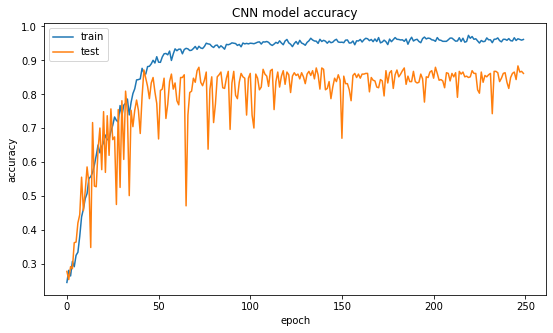

In [87]:
# summarize history for accuracy
fig = plt.figure(figsize=(9,5))
plt.plot(cnn_hist.history['accuracy'])
plt.plot(cnn_hist.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('CNN model accuracy', bbox_inches='tight', transparent=False, dpi='figure', quality=95)

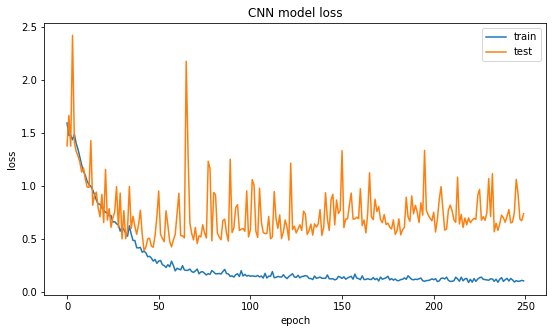

In [88]:
# summarize history for loss
fig = plt.figure(figsize=(9,5))
plt.plot(cnn_hist.history['loss'])
plt.plot(cnn_hist.history['val_loss'])
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('CNN model loss', bbox_inches='tight', transparent=False, dpi='figure', quality=95)

## Save model

In [17]:
from keras.models import load_model
from keras.models import model_from_json

In [18]:
# Saving the model for Future Inferences
model_json = model.to_json()
with open("Plant_2489_cnn_ep250.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save('Plant_2489_cnn_ep250.h5')  # creates a HDF5 file 'my_model.h5'
#saving the weights of the model
model.save_weights('Plant_2489_cnn_ep250.h5')
print("Saved model to disk")

Saved model to disk


In [20]:
# save the model to disk
import pickle
filename = 'Plant_CNN_ep250.sav'
pickle.dump(model, open(filename, 'wb'))

## Prediction

In [19]:
# Make prediction

predict= model.predict(x_test)

prediction = np.ndarray(shape = (test_data.shape[0],4), dtype = np.float32)
for row in range(test_data.shape[0]):
    for col in range(4):
        if predict[row][col] == max(predict[row]):
            prediction[row][col] = 1
        else:
            prediction[row][col] = 0
            
prediction = pd.DataFrame(prediction)
prediction.columns = ['healthy', 'multiple_diseases', 'rust', 'scab']
df = pd.concat([test_data.image_id, prediction], axis = 1)
df.to_csv('Plant_CNN_ep250_5L.csv', index = False)

In [21]:
# Validation
from sklearn.metrics import roc_auc_score

In [22]:
# prediction
y_pred = model.predict(x_val)
# print roc_auc score
print("roc_auc score:{}".format(roc_auc_score(y_true= y_val, y_score=y_pred, average="weighted").round(3)))

roc_auc score:0.968


In [23]:
#Check score on testing data
loss_test, acc_test = model.evaluate(x_val, y_val)

print(f'Test accuracy: {acc_test:.3f}')
print(f'Test loss: {loss_test:.3f}')

498/498 [==============================] - 3s 6ms/step
Test accuracy: 0.861
Test loss: 0.737
